# 言語処理100本ノック 2020 (Rev 2)



## 第6章: 機械学習

### 50. データの入手・整形

In [6]:
import pandas as pd

df_org = pd.read_csv('NewsAggregatorDataset/newsCorpora.csv',sep='\t', header=None, names=['id', 'title', 'url', 'publisher','category','story','hostname','timestamp'])

df_org

FileNotFoundError: [Errno 2] No such file or directory: 'NewsAggregatorDataset/newsCorpora.csv'

In [ ]:
# 抽出

publishers = ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]

df = df_org.query("publisher in @publishers")

In [ ]:
# シャッフル

df = df.sample(frac=1)

df.head()

,id,title,url,publisher,category,story,hostname,timestamp
147773,148109,Home > Tom Hanks > Tom Hanks And Steven Spielb...,http://www.contactmusic.com/story/tom-hanks-an...,Contactmusic.com,e,d6WbEbbyA67h6sM7cFFa77tmNGOFM,www.contactmusic.com,1398170093312
91913,91989,Twitter morphs further into Facebook with filt...,http://www.dailymail.co.uk/sciencetech/article...,Daily Mail,t,dhzjRpgru5-m7GMn0BusZ54_VSSXM,www.dailymail.co.uk,1396990234953
99311,99508,Rodrigo Santoro Opens Up About The Price He Pa...,http://www.huffingtonpost.com/2014/04/09/rodri...,Huffington Post,e,dyjwYV6L2OQ1JEMFhOWDVwX4jc-vM,www.huffingtonpost.com,1397242472058
6217,6218,Shailene Woodley arrives at LAX with hunky The...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,ddfEq1wKc7iCzGMvYSy_ekodamTeM,www.dailymail.co.uk,1394598701413
273189,273635,Saturn's Northern Lights Glow Luminous Blue In...,http://www.huffingtonpost.com/2014/06/03/satur...,Huffington Post,t,dxrfehFJtNT5_4MyclRysvJ2xqIUM,www.huffingtonpost.com,1401893313949


In [ ]:
# 振り分け
train_rows = round(len(df) * 0.8)
valid_rows = round(len(df) * 0.1)
train_df = df[0:train_rows]
valid_df = df[train_rows:train_rows+valid_rows]
test_df =  df[train_rows+valid_rows:]
print(len(df),len(train_df),len(valid_df),len(test_df),len(train_df)+len(valid_df)+len(test_df))


13340 10672 1334 1334 13340


In [ ]:
# ファイル出力

#train_df[["id","category","title","url","publisher"]].to_csv('train.txt',sep='\t',index=False,header=False)
train_df[["category","title"]].to_csv('train.txt',sep='\t',index=False,header=False)
valid_df[["category","title"]].to_csv('valid.txt',sep='\t',index=False,header=False)
test_df[["category","title"]].to_csv('test.txt',sep='\t',index=False,header=False)

In [10]:
# 事例数確認

#train_df["category"].unique()
#train_df.query("title.str.contains('The Best Reactions')",engine='python')[["id","title","url"]]
#df_org.query("title.str.contains('The Best Reactions')",engine='python')[["id","title","url"]]

!cat train.txt | cut -f 1 | sort | uniq -c
!cat valid.txt | cut -f 1 | sort | uniq -c
!cat test.txt | cut -f 1 | sort | uniq -c


   4526 b
   4213 e
    730 m
   1216 t
    554 b
    540 e
     87 m
    155 t
    547 b
    541 e
     93 m
    154 t


In [56]:
# 読み込み直し
train_df = pd.read_table('train.txt', header=None, names=["category","title"])
valid_df = pd.read_table('valid.txt', header=None, names=["category","title"])
test_df = pd.read_table('test.txt', header=None, names=["category","title"])


### 51. 特徴量抽出

- <https://qiita.com/tsal3290s/items/e4fdb7c94de7600557f8>

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import joblib

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['title'])
X_valid = vectorizer.transform(valid_df['title'])
X_test = vectorizer.transform(test_df['title'])
np.savetxt('train.feature.txt', X_train.toarray(), fmt='%d') # スパース行列から密行列に変換
np.savetxt('valid.feature.txt', X_valid.toarray(), fmt='%d')
np.savetxt('test.feature.txt', X_test.toarray(), fmt='%d')           
joblib.dump(vectorizer.vocabulary_, 'ch06_vocabulary_.joblib')

['ch06_vocabulary_.joblib']

In [58]:
pd.DataFrame(X_test.toarray())

,0,1,2,3,4,5,6,7,8,9,...,12794,12795,12796,12797,12798,12799,12800,12801,12802,12803
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
vectorizer.get_feature_names()

['00',
 '07',
 '08',
 '0ut',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100th',
 '101',
 '103',
 '104',
 '106',
 '107',
 '108',
 '10k',
 '10m',
 '10million',
 '10th',
 '11',
 '110',
 '1100',
 '111',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '11m',
 '12',
 '120',
 '121',
 '1270',
 '129',
 '13',
 '1300',
 '131',
 '13th',
 '14',
 '142136',
 '148',
 '14lb',
 '14m',
 '14th',
 '15',
 '150',
 '1500',
 '150m',
 '1550',
 '15lbs',
 '15m',
 '15th',
 '16',
 '16k',
 '16m',
 '17',
 '17000',
 '175',
 '179',
 '18',
 '18000',
 '186f',
 '19',
 '1900',
 '19000',
 '1914',
 '1918',
 '1950s',
 '1956',
 '1964',
 '1979',
 '1980s',
 '1981',
 '1987',
 '1990s',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '1bn',
 '1d',
 '1m',
 '1q',
 '1st',
 '20',
 '200',
 '2000',
 '20000',
 '200000',
 '2001',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '2021',
 '2023',
 '2030',
 '2049',
 '2064',
 '20th',
 '2

In [60]:
vectorizer.vocabulary_

{'george': 4955,
 'clooney': 2457,
 'father': 4381,
 'thrilled': 11539,
 'with': 12603,
 'engagement': 4010,
 'brazilian': 1729,
 'real': 9210,
 'falls': 4335,
 'as': 998,
 'yellen': 12731,
 'rate': 9166,
 'outlook': 8106,
 'spurs': 10777,
 'dollar': 3599,
 'rally': 9129,
 'dating': 3124,
 'website': 12439,
 'okcupid': 7962,
 'tells': 11407,
 'users': 12108,
 'to': 11609,
 'boycott': 1688,
 'mozilla': 7580,
 'search': 10022,
 'engine': 4011,
 'over': 8122,
 'hiring': 5542,
 'beyonce': 1455,
 'jay': 6142,
 'announce': 819,
 'on': 7983,
 'the': 11473,
 'run': 9802,
 'tour': 11670,
 'dates': 3123,
 'harry': 5355,
 'potter': 8703,
 'rupert': 9810,
 'grint': 5170,
 'make': 6985,
 'broadway': 1797,
 'debut': 3169,
 'in': 5837,
 'it': 6100,
 'only': 7989,
 'play': 8561,
 'hearts': 5429,
 'of': 7937,
 'gold': 5063,
 'keith': 6330,
 'urban': 12088,
 'and': 777,
 'nicole': 7774,
 'kidman': 6363,
 'donate': 3618,
 'signed': 10342,
 'guitar': 5221,
 'kerry': 6344,
 'washington': 12388,
 'filming':


### 52. 学習

In [61]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1500)
clf.fit(X_train, train_df['category']) 
# print(len(X_train.toarray()))

LogisticRegression(max_iter=1500)

### 53. 予測

In [62]:
dic = {'b':'business', 't':'science and technology', 'e' : 'entertainment', 'm' : 'health'}

def predict(text):
    text = [text]
    X = vectorizer.transform(text)
    ls_proba = clf.predict_proba(X)
    for proba in ls_proba:
        for c, p in zip(clf.classes_, proba):
            print (dic[c]+':',p)
s = train_df.iloc[0]['title']
print(s)
predict(s) 

George Clooney - George Clooney father 'thrilled' with engagement
business: 0.0006971438794722934
entertainment: 0.9985771461479542
health: 0.0003324855903061522
science and technology: 0.00039322438226743105



### 54. 正解率の計測

In [66]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(y_train_pred)
print(y_test_pred)

y_train = train_df['category']
y_test = test_df['category']

print (accuracy_score(y_train, y_train_pred))
print (accuracy_score(y_test, y_test_pred))    

['e' 'b' 't' ... 'b' 'b' 'b']
['b' 'b' 'b' ... 'e' 'e' 'e']
0.9959756668226486
0.9078651685393259



### 55. 混同行列の作成

In [67]:
from sklearn.metrics import confusion_matrix

print (confusion_matrix(y_train, y_train_pred, labels=['b','t','e','m']))
print (confusion_matrix(y_test, y_test_pred, labels=['b','t','e','m']))

[[4512    9    5    0]
 [  15 1199    2    0]
 [   6    2 4205    0]
 [   2    0    2  726]]
[[514  14  16   3]
 [ 23 113  16   2]
 [  8   4 529   0]
 [ 14   4  19  56]]



### 56. 適合率，再現率，F1スコアの計測

In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 適合率
print (precision_score(y_test, y_test_pred, average=None, labels=['b','t','e','m']))
# 再現率
print (recall_score(y_test, y_test_pred, average=None, labels=['b','t','e','m']))
# F1スコア
print (f1_score(y_test, y_test_pred, average=None, labels=['b','t','e','m']))
# マイクロ平均
print (precision_score(y_test, y_test_pred, average='micro', labels=['b','t','e','m']))
print (recall_score(y_test, y_test_pred, average='micro', labels=['b','t','e','m']))
print (f1_score(y_test, y_test_pred, average='micro', labels=['b','t','e','m']))
# マクロ平均
print (precision_score(y_test, y_test_pred, average='macro', labels=['b','t','e','m']))
print (recall_score(y_test, y_test_pred, average='macro', labels=['b','t','e','m']))
print (f1_score(y_test, y_test_pred, average='macro', labels=['b','t','e','m']))     

[0.91949911 0.83703704 0.91206897 0.91803279]
[0.93967093 0.73376623 0.97781885 0.60215054]
[0.92947559 0.78200692 0.94380018 0.72727273]
0.9078651685393259
0.9078651685393259
0.9078651685393259
0.8966594737462854
0.8133516394332706
0.8456388534508801



### 57. 特徴量の重みの確認

In [70]:
names = np.array(vectorizer.get_feature_names())
labels=['b','t','e','m']
for c, coef in zip(clf.classes_, clf.coef_): # カテゴリ毎に表示する
    idx = np.argsort(coef)[::-1]
    print (dic[c])
    print (names[idx][:10]) # 重みの高い特徴量トップ10
    print (names[idx][-10:][::-1]) # 重みの低い特徴量トップ10          

business
['bank' 'fed' 'ecb' 'dollar' 'ukraine' 'yellen' 'china' 'obamacare'
 'stocks' 'oil']
['activision' 'aereo' 'ebola' 'she' 'twitch' 'nintendo' 'virus' 'cap'
 'heartbleed' 'subscription']
entertainment
['kardashian' 'movie' 'chris' 'thrones' 'transformers' 'paul' 'aereo'
 'miley' 'cyrus' 'hbo']
['google' 'gm' 'facebook' 'china' 'data' 'risk' 'obamacare' 'climate'
 'study' 'microsoft']
health
['ebola' 'cancer' 'fda' 'study' 'drug' 'mers' 'cigarettes' 'cases'
 'medical' 'cdc']
['gm' 'facebook' 'dimon' 'ceo' 'climate' 'apple' 'twitter' 'billion'
 'netflix' 'price']
science and technology
['facebook' 'google' 'apple' 'climate' 'microsoft' 'activision' 'nasa'
 'heartbleed' 'gm' 'tesla']
['stocks' 'percent' 'close' 'american' 'grows' 'men' 'valued' 'fed'
 'health' 'drug']



### 58. 正則化パラメータの変更

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


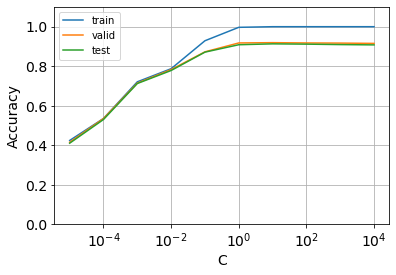

In [73]:
import matplotlib.pyplot as plt
def calc_scores(c):
    y_train = train_df['category']
    y_valid = valid_df['category']
    y_test = test_df['category']

    clf = LogisticRegression(C=c, max_iter=1500)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_valid_pred = clf.predict(X_valid)
    y_test_pred = clf.predict(X_test)

    scores = []
    scores.append(accuracy_score(y_train, y_train_pred))
    scores.append(accuracy_score(y_valid, y_valid_pred))
    scores.append(accuracy_score(y_test, y_test_pred))
    return scores

C = np.logspace(-5, 4, 10, base=10)
print(C)
scores = []
for c in C:
    scores.append(calc_scores(c))
scores = np.array(scores).T
labels = ['train', 'valid', 'test']

for score, label in zip(scores,labels):
    plt.plot(C, score, label=label)
plt.ylim(0, 1.1)
plt.xscale('log')
plt.xlabel('C', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend()
